<a href="https://colab.research.google.com/github/Mithun162001/Python-Notebooks/blob/main/MNIST_SGDClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import numpy as np
 import pandas as pd
 import seaborn as sns
 import matplotlib.pyplot as plt
 %matplotlib inline

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [16]:
mnist.keys()  # Dictionary keys include these many things

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [17]:
mnist.DESCR   # gives the description of the dataset

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [18]:
X,y = mnist["data"], mnist["target"]

In [20]:
X.shape   # we have 70000 images and 784 features

(70000, 784)

In [21]:
y.shape

(70000,)

* There are 70000 images and each image has 784 features
* This is because each image is 28*28 image and each feature simply represents one pixel's intensity, from 0 to 255(w/b image)

In [22]:
import matplotlib as mpl 

In [23]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

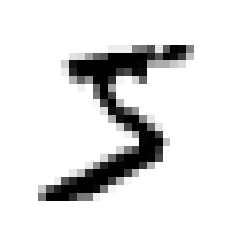

In [24]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()        # this looks like 5

In [25]:
# let's see what the label tells us
y[0]
# It's 5

'5'

In [28]:
type(y[0])
# The label is a string, we needed it to be numerical
y= y.astype(np.uint8)

In [30]:
type(y[0])

numpy.uint8

In [32]:
# The MNIST dataset is actually already split into a training set, the first 60000 observations and the test set being last 10000 images
X_train, X_test, y_train, y_test= X[:60000], X[60000:], y[:60000], y[60000:]

In [33]:
# Training a binary classifier
# Now let's try only to identify one digit - the number 5
# The model we build should be capable of distingusihing between just two categories: 5 and not 5

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

* Now let's choose a classifier algorithm
* Since n>30000, we can choose Gradient Descent based classifiers
* Here we choose Stochastic Gradient Descent(SGD Classifier)

In [34]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(random_state = 42)

In [35]:
model.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
# Now let's predict
predict = model.predict([some_digit])
predict

array([ True])